In [104]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

from pathlib import Path

from autumn.settings import INPUT_DATA_PATH


If not in an 'AuTuMN' python environment. Edit and run the cell below to manually create the path to files.

In [105]:
style.use("dark_background")
p = Path(".")
# INPUT_DATA_PATH = p.joinpath('c:\\', "Users","maba0001", "AuTuMN", "data", "inputs")

In [106]:

fb_2021 = p.joinpath(INPUT_DATA_PATH, "mobility", "movement-range-2021.txt")
fb_2022 = p.joinpath(INPUT_DATA_PATH, "mobility", "movement-range-2022-04-25.txt")
gg = p.joinpath(INPUT_DATA_PATH, "mobility", "Google_Mobility_Report.csv")



In [107]:
df_list = []
for file in {fb_2021,fb_2022}:
    df = pd.read_csv(file, delimiter="\t")
    df = df[df["country"]=="BTN"]
    df_list.append(df)

fb_mov = pd.concat(df_list)

C:\Users\maba0001\AppData\Local\Temp\ipykernel_9948\195887657.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, delimiter="\t")
C:\Users\maba0001\AppData\Local\Temp\ipykernel_9948\195887657.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, delimiter="\t")


In [108]:
btn_mov = fb_mov.groupby('ds', as_index=False).mean()

In [109]:
btn_mov.rename(columns={"all_day_bing_tiles_visited_relative_change":"visited_tiles","all_day_ratio_single_tile_users":"single_tiles" }, inplace=True)

In [110]:
MAP_FACTORS = {'retail_and_recreation_percent_change_from_baseline': 30,
       'grocery_and_pharmacy_percent_change_from_baseline': 20,
       'parks_percent_change_from_baseline': 20,
       'transit_stations_percent_change_from_baseline': 40,
       'workplaces_percent_change_from_baseline': 50,
       'residential_percent_change_from_baseline': 40}

In [111]:
for col, val in MAP_FACTORS.items():
    if col != 'residential_percent_change_from_baseline':
        btn_mov[col] = val * btn_mov["visited_tiles"]
    else:
        btn_mov[col] = val * btn_mov["single_tiles"]
        

In [112]:
btn_mov

,ds,visited_tiles,single_tiles,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-01,-0.031681,0.158795,-0.950420,-0.633613,-0.633613,-1.267227,-1.584033,6.351787
1,2020-03-02,-0.033898,0.147343,-1.016929,-0.677953,-0.677953,-1.355906,-1.694882,5.893718
2,2020-03-03,-0.024080,0.154181,-0.722400,-0.481600,-0.481600,-0.963200,-1.204000,6.167225
3,2020-03-04,0.011673,0.147913,0.350180,0.233453,0.233453,0.466907,0.583633,5.916507
4,2020-03-05,0.020682,0.142365,0.620471,0.413647,0.413647,0.827294,1.034118,5.694612
...,...,...,...,...,...,...,...,...,...
781,2022-04-21,-0.106540,0.160234,-3.196200,-2.130800,-2.130800,-4.261600,-5.327000,6.409360
782,2022-04-22,-0.117890,0.169758,-3.536700,-2.357800,-2.357800,-4.715600,-5.894500,6.790320
783,2022-04-23,-0.084266,0.157712,-2.527980,-1.685320,-1.685320,-3.370640,-4.213300,6.308480
784,2022-04-24,-0.069684,0.166292,-2.090520,-1.393680,-1.393680,-2.787360,-3.484200,6.651680


In [113]:
MOB_COL = [col for col in gg_mob.columns if "_percent_change_from_baseline" in col]

Get facebook mobility for country and regions of interest.

For now take the mean. But ideally the weighted average based on population should be used.<br>
To implement this the population of each sub-region(VNM.25, VNM.27) is required.
 

<Figure size 360x360 with 0 Axes>

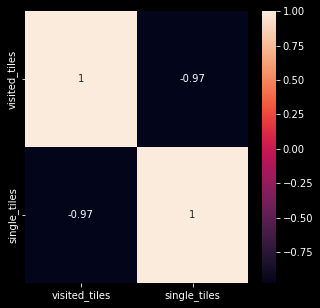

In [114]:
corr_plot = btn_mov[['visited_tiles', 'single_tiles']].corr()
plt.figure(figsize=(5,5))
hm = sns.heatmap(corr_plot, annot = True)

In [115]:
btn_mov.set_index(btn_mov['ds'], inplace= True)

<AxesSubplot:xlabel='ds'>

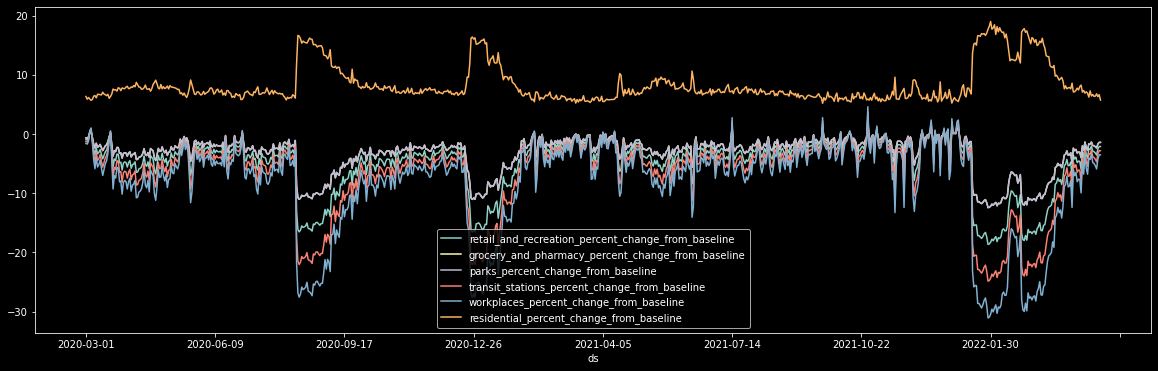

In [116]:
btn_mov[MOB_COL].plot(figsize=(20,6))

<AxesSubplot:xlabel='ds'>

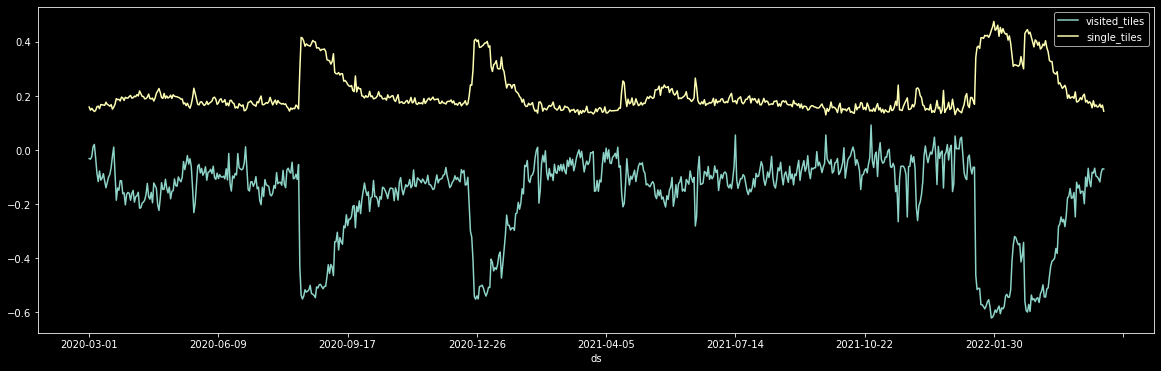

In [117]:
btn_mov[["visited_tiles","single_tiles"]].plot(figsize=(20,6))

Create a csv for input db.

In [118]:
btn_mov

,ds,visited_tiles,single_tiles,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
ds,,,,,,,,,
2020-03-01,2020-03-01,-0.031681,0.158795,-0.950420,-0.633613,-0.633613,-1.267227,-1.584033,6.351787
2020-03-02,2020-03-02,-0.033898,0.147343,-1.016929,-0.677953,-0.677953,-1.355906,-1.694882,5.893718
2020-03-03,2020-03-03,-0.024080,0.154181,-0.722400,-0.481600,-0.481600,-0.963200,-1.204000,6.167225
2020-03-04,2020-03-04,0.011673,0.147913,0.350180,0.233453,0.233453,0.466907,0.583633,5.916507
2020-03-05,2020-03-05,0.020682,0.142365,0.620471,0.413647,0.413647,0.827294,1.034118,5.694612
...,...,...,...,...,...,...,...,...,...
2022-04-21,2022-04-21,-0.106540,0.160234,-3.196200,-2.130800,-2.130800,-4.261600,-5.327000,6.409360
2022-04-22,2022-04-22,-0.117890,0.169758,-3.536700,-2.357800,-2.357800,-4.715600,-5.894500,6.790320
2022-04-23,2022-04-23,-0.084266,0.157712,-2.527980,-1.685320,-1.685320,-3.370640,-4.213300,6.308480


In [119]:
input_df = btn_mov[['ds']+MOB_COL]
input_df["sub_region_1"] = None

C:\Users\maba0001\AppData\Local\Temp\ipykernel_9948\3177104099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df["sub_region_1"] = None


In [120]:
#input_df.rename(columns=lambda x:  f"{x}_percent_change_from_baseline" if x not in {'ds',"polygon_name"} else x,inplace=True)
input_df.rename(columns={'ds':"date"}, inplace = True)
input_df["country_region"] = "Bhutan"

C:\Users\maba0001\AppData\Local\Temp\ipykernel_9948\4011003412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.rename(columns={'ds':"date"}, inplace = True)


In [121]:
btn_csv = p.joinpath(INPUT_DATA_PATH, "mobility", "BTN_mobility.csv")

In [122]:
input_df.to_csv(btn_csv, index=False)